In [41]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

UsageError: Line magic function `%tensorflow_version` not found.


In [42]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

### Reading the data from h5py file

In [44]:
import h5py

In [45]:
file = h5py.File('SVHN_single_grey1.h5','r')

In [46]:
file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [47]:
x_train = file['X_train'][:]
y_train = file['y_train'][:]
x_test  = file['X_test'][:]
y_test  = file['y_test'][:]

### Printing shape and some values of label

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


### x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 32,32)
### y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
### There are 42000 samples in training data each sample with dimension 32*32
### There are 18000 samples in testing data each sample with dimension 32*32

In [49]:
print(x_train.max())
print(x_train.min())

254.9745
0.0


x_train and x_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

In [50]:
print('First 5 examples are: ', y_train[0:5])

First 5 examples are:  [2 6 7 4 4]


The label is 7


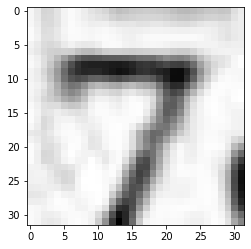

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
print('The label is {}'.format(y_train[8000]))
plt.imshow(x_train[8000],cmap = 'gray')

The label is 6


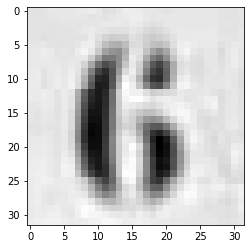

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
print('The label is {}'.format(y_train[1000]))
plt.imshow(x_train[1000],cmap = 'gray')

### There are some distractors in the image samples.

### Reshape features
- reshape() method gives a new shape to an array without changing its data

In [55]:
x_train = x_train.reshape(42000, 1024)
print(x_train.shape)
x_test = x_test.reshape(18000, 1024)
print(x_test.shape)

(42000, 1024)
(18000, 1024)


### Normalize features
- Normalize features from 0-255 to 0-1

In [56]:
print(x_train.max())
print(x_train.min())
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.max())
print(x_train.min())

254.9745
0.0
0.9999
0.0



### One-hot encoding for the class vector
- convert class vectors (integers) to binary class matrix
- convert x_train and x_test
- number of classes: 10

In [57]:
from tensorflow.keras.utils import to_categorical

In [58]:
print(y_train[10])
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Initialize & building  the model

### Define the model
- The Sequential model is a linear stack of layers.
- The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.

In [59]:
# Initializing the sequential model
classifier = Sequential()

In [60]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dropout

In [61]:
# Flattening layer
classifier.add(Dense(400, input_shape=(1024,), activation='relu'))

In [62]:
# Hidden layers
classifier.add(Dense(activation = 'relu', units = 400, kernel_initializer='uniform',name='Layer_1'))
classifier.add(Dense(activation = 'relu', units = 200, kernel_initializer='uniform',name='Layer_2'))

# Dropout layer
classifier.add(Dropout(0.5))

# Hidden layers
classifier.add(Dense(activation = 'relu', units = 100, kernel_initializer='uniform',name='Layer_3'))
classifier.add(Dense(activation = 'relu', units = 50, kernel_initializer='uniform',name='Layer_4'))

# Dropout layer
classifier.add(Dropout(0.5))

In [63]:
#Output layer
classifier.add(Dense(10, activation='softmax', name='Output'))

### Compile the model

In [64]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Summarize the model
- model.summary() prints a summary representation of the model. For layers with multiple outputs, multiple is displayed instead of each individual output shape due to size limitations.

In [65]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 400)               410000    
_________________________________________________________________
Layer_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
Layer_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)               

### Fitting the model
- .fit() trains the model for a fixed number of epochs (iterations on a dataset)
- batch_size is the number of samples per gradient update
- validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch

In [66]:
classifier.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size = 32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 8s 179us/sample - loss: 2.3031 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.0955
Epoch 2/30
42000/42000 [==============================] - 7s 171us/sample - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.0955
Epoch 3/30
42000/42000 [==============================] - 7s 169us/sample - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3029 - val_accuracy: 0.0982
Epoch 4/30
42000/42000 [==============================] - 7s 176us/sample - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 5/30
42000/42000 [==============================] - 7s 175us/sample - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 6/30
42000/42000 [==============================] - 8s 179us/sample - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 7/30
42000/42000 [==========================

# Model Evaluation

In [67]:
classifier.evaluate(x_test, y_test)

18000/18000 [==============================] - 1s 42us/sample - loss: 2.3029 - accuracy: 0.0955


[2.302928009668986, 0.0955]

### Since the loss is high and accuracy is very low, we will go with some regularization techniques.

In [68]:
from tensorflow.keras import regularizers

In [82]:
def fully_connected_model(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_train, y_train, verbose=0)
    
    return score

### Hyperparameter Tuning

In [83]:
lr = 0.00001
Lambda = 0
score,cm = fully_connected_model(1, lr, Lambda)

Train on 42000 samples
42000/42000 [==============================] - 1s 17us/sample - loss: 2.2981 - accuracy: 0.1265


### still there is no improvement, Loss barely changing. Learning rate is probably too low.

### Running with lr=0.02 and Lambda=1e-4

In [74]:
lr = 2e-2
Lambda = 1e-4
fully_connected_model(100, lr, Lambda)

Train on 42000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 22us/sample - loss: 2.3024 - accuracy: 0.1212
Epoch 2/100
42000/42000 [==============================] - 0s 11us/sample - loss: 2.1290 - accuracy: 0.2894
Epoch 3/100
42000/42000 [==============================] - 0s 11us/sample - loss: 1.7593 - accuracy: 0.4275
Epoch 4/100
42000/42000 [==============================] - 0s 11us/sample - loss: 1.5133 - accuracy: 0.5302
Epoch 5/100
42000/42000 [==============================] - 0s 11us/sample - loss: 1.3652 - accuracy: 0.5818
Epoch 6/100
42000/42000 [==============================] - 0s 12us/sample - loss: 1.2646 - accuracy: 0.6162
Epoch 7/100
42000/42000 [==============================] - 0s 12us/sample - loss: 1.2001 - accuracy: 0.6355
Epoch 8/100
42000/42000 [==============================] - 0s 11us/sample - loss: 1.1275 - accuracy: 0.6622
Epoch 9/100
42000/42000 [==============================] - 1s 12us/sample - loss: 1.0851 - accuracy: 0.6726
Epoch

42000/42000 [==============================] - 1s 14us/sample - loss: 0.4857 - accuracy: 0.8590
Epoch 76/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4828 - accuracy: 0.8585
Epoch 77/100
42000/42000 [==============================] - 1s 15us/sample - loss: 0.4823 - accuracy: 0.8601
Epoch 78/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4812 - accuracy: 0.8596
Epoch 79/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4755 - accuracy: 0.8613
Epoch 80/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4702 - accuracy: 0.8634
Epoch 81/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4717 - accuracy: 0.8628
Epoch 82/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4670 - accuracy: 0.8640
Epoch 83/100
42000/42000 [==============================] - 1s 14us/sample - loss: 0.4582 - accuracy: 0.8667
Epoch 84/100
42000/42000 [======

[0.42467472266299383, 0.8761905]

### As we can see from above iterations loss is 40% and accuracy is 88%

### 88.34 % of testing data was classified correctly